In [1]:
# Dependencies
import numpy as np

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [58]:
inspector = inspect(engine)
inspector.get_table_names()
inspector.get_columns('measurement')

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'date',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'prcp',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'tobs',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [7]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [53]:
# Import the sqlalchemy extract function.
from sqlalchemy import extract

# 1. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_temps = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date.regexp_match('\d{4}.06.\d{2}')).all()
#june_temps


In [56]:
# 2. Convert the June temperatures to a list.
june_temps_list = [item[1] for item in june_temps]
#june_temps_list

In [55]:
# 3. Create a DataFrame from the list of temperatures for the month of June. 
import pandas as pd

june_temps_df = pd.DataFrame(june_temps_list, columns=['June Temperature'])
june_temps_df

,June Temperature
0,78.0
1,76.0
2,78.0
3,76.0
4,77.0
...,...
1695,79.0
1696,74.0
1697,74.0
1698,76.0


In [41]:
# 4. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temps_df.describe()


,June Temperature
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


In [ ]:
# 5. Return to your challenge instructions to compare your summary statistics

## D2: Determine the Summary Statistics for December

In [50]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_temps = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date.regexp_match('\d{4}.12.\d{2}')).all()
#dec_temps

In [51]:
# 7. Convert the December temperatures to a list.
dec_temps_list = [item[1] for item in dec_temps]
#dec_temps_list

In [52]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temps_df = pd.DataFrame(dec_temps_list, columns=['December Temperature'])
dec_temps_df

,December Temperature
0,76.0
1,74.0
2,74.0
3,64.0
4,64.0
...,...
1512,71.0
1513,71.0
1514,69.0
1515,65.0


In [43]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temps_df.describe()

,December Temperature
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [ ]:
# 10. Return to your challenge instructions to compare your summary statistics

In [67]:
# getting analagous precipitation data for june

june_prcp = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date.regexp_match('\d{4}.06.\d{2}')).all()

june_prcp_list = [item[1] for item in june_prcp]

june_prcp_df = pd.DataFrame(june_prcp_list, columns=['June Precipitation'])
june_prcp_df.describe()

,June Precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


<AxesSubplot:ylabel='Frequency'>

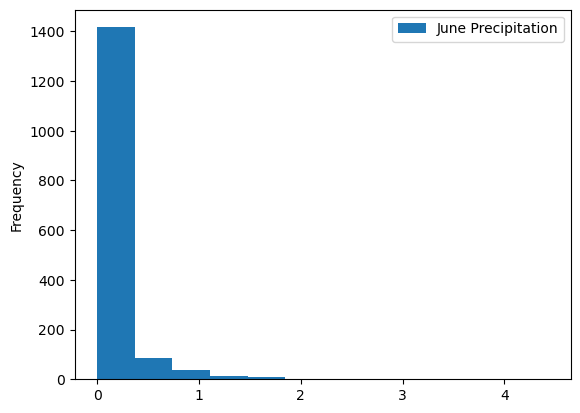

In [75]:
june_prcp_df.plot.hist(bins=12)

In [66]:
# getting analagous precipitation data for december

december_prcp = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date.regexp_match('\d{4}.12.\d{2}')).all()

december_prcp_list = [item[1] for item in december_prcp]

december_prcp_df = pd.DataFrame(december_prcp_list, columns=['December Precipitation'])
december_prcp_df.describe()

,December Precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


<AxesSubplot:ylabel='Frequency'>

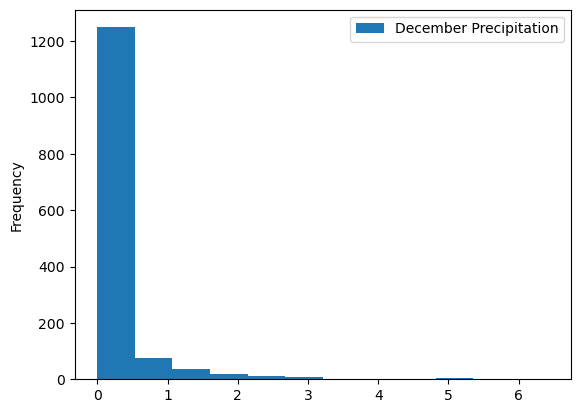

In [74]:
december_prcp_df.plot.hist(bins=12)

<AxesSubplot:ylabel='Frequency'>

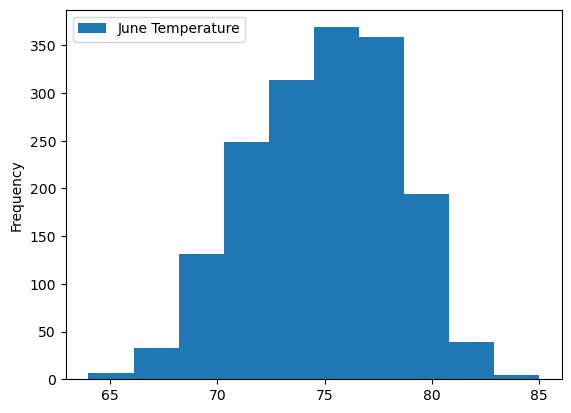

In [78]:
june_temps_df.plot.hist(bins=10)

<AxesSubplot:ylabel='Frequency'>

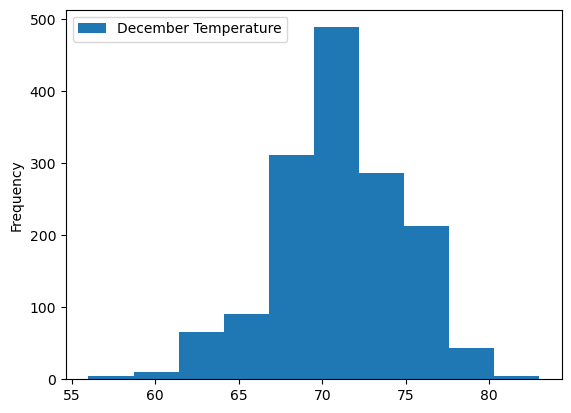

In [79]:
dec_temps_df.plot.hist(bins=10)